<h2 align="center"> Zoo Animal Classification/Avance II </h2>
<h2 align="center"> Equipo1. Grupo: 001, Lunes-Miércoles-Viernes/6:00p.m.-7:00p.m. </h2>
<h2>Integrantes:</h2>
<ul style="list-style-type:circle;">
  <li>1884110, Garcia Villarreal Lizeth Guadalupe</li>
  <li>1884095, Mata Monsiváis Angel Alfonso</li>
  <li>1739252, Ontiveros Castillo Emmanuel</li>
</ul> 

## Motivación.

- El reino animal, con su infinidad de formas, características y cualidades es un área que ha sido de gran interés para diferentes ciencias durante la historia de la humanidad. Sinembargo es a la vez un lugar al cual queda mucho por conocer. Por tal motivo, por medio de este proyecto se intentará realizar clasificaciones de animales que van más allá de lo obvio en base a un árbol de decisiones. 

<h2> Preguntas de interés.</h2>
<ul style="list-style-type:circle;">
  <li>¿Las características más concluyentes son referentes a la agrupación de animales para las especies “mamíferos”, “aves” y “ peces”?.</li>
  <li>¿Podemos hacer un clasificador con las características importantes?</li>
</ul> 

In [1]:
#Importar librerías
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd 
import seaborn as sns
import pandas_profiling
from matplotlib.colors import ListedColormap

## 1. Lectura y limpieza de datos.

* Cargar datos de tabla Zoo y tabla Clases en su respectivo data frame para su manipulación. El data frame zoo contiene las características de los animales. El data frame zooClas contiene las clases (1: Mammal, 2: Bird, 3: Reptile, 4: Fish, 5: Amphibian, 6: Bug, 7: Invertebrate) a las que pertenecen los animales.


In [2]:
#Primera tabla.
zoo = pd.read_csv('C:/Users/Lizee/Desktop/Proyecto/zoo.csv')
#Segunda tabla.
zooClass = pd.read_csv('C:/Users/Lizee/Desktop/Proyecto/class.csv')

* Encabezado de Zoo (Primera tabla), visualización previa. Se puede observar que los valores que contiene son en binario (1,0) verdadero o falso, a excepción de dos columnas las cuales son legs que contienen el número de piernas del animal, y class_type que contiene el número de la clase de animal que pertenece haciendo referencia al segundo data frame zooClass.


In [3]:
zoo

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


* Verificación de valores de la tabla Zoo y valores nulos.

In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
animal_name    101 non-null object
hair           101 non-null int64
feathers       101 non-null int64
eggs           101 non-null int64
milk           101 non-null int64
airborne       101 non-null int64
aquatic        101 non-null int64
predator       101 non-null int64
toothed        101 non-null int64
backbone       101 non-null int64
breathes       101 non-null int64
venomous       101 non-null int64
fins           101 non-null int64
legs           101 non-null int64
tail           101 non-null int64
domestic       101 non-null int64
catsize        101 non-null int64
class_type     101 non-null int64
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


* Verificación de la suma de los valores nulos que contenga.

In [5]:
zoo.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

_No hay valores nulos en este data frame de zoo._

* Verificación en busca de animales duplicados de la columna animal_name de la tabla Zoo.

In [6]:
duplicates = zoo.animal_name.value_counts()
duplicates[duplicates > 1]

frog    2
Name: animal_name, dtype: int64

_Aparece frog repetido dos veces._

* Se mostrará a continuación estos duplicados de frog para ver la semejanza que hay en sus características para tomarse una decisión.

In [7]:
frog = zoo.loc[zoo['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


_Se encontró en sus características que una frog es venenosa y otra no. Por tal solo se cambiara el nombre par distinguir._

* Se nombró distinto las 2 tipos de frog poniendo la que es venenosa como venoumos_frog en la columa animal_name.

In [8]:
zoo['animal_name'][(zoo.venomous == 1 )& (zoo.animal_name == 'frog')] = 'venoumous_frog'

C:\Users\Lizee\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


* Comprobación de estas frog nuevamente.

In [9]:
frog = zoo.loc[zoo['animal_name'] == 'frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5


In [10]:
venoumous_frog = zoo.loc[zoo['animal_name'] == 'venoumous_frog']
venoumous_frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
26,venoumous_frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


* Como se menciona anteriormente, legs es el único que no está en binario así que se verá que valores numéricos tiene.

In [11]:
print(zoo.legs.unique())

[4 0 2 6 8 5]


_Es curioso que haya animales con 5 piernas así que veremos de cuáles se trata._

In [12]:
zoo.loc[zoo['legs'] == 5]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
85,starfish,0,0,1,0,0,1,1,0,0,0,0,0,5,0,0,0,7


_Una estrella de mas con 5 puntas como piernas parece valido._

* Encabezado de clases, visualización previa (Segunda tabla).

In [13]:
zooClass

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"
5,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
6,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


* Verificando valores de tabla class.

In [14]:
zooClass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 4 columns):
Class_Number                         7 non-null int64
Number_Of_Animal_Species_In_Class    7 non-null int64
Class_Type                           7 non-null object
Animal_Names                         7 non-null object
dtypes: int64(2), object(2)
memory usage: 352.0+ bytes


* Unión de ambos data frame de zoo y zooClass para tener una sola tabla y tener mas optima y concreta la información con los cambios hechos anteriormente como la corrección de la rana venenosa y la rana.

In [15]:
unir = pd.merge(zoo,zooClass,how='left',left_on='class_type',right_on='Class_Number')
unir.head(100)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,vulture,0,1,1,0,1,0,1,0,1,...,0,2,1,0,1,2,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
96,wallaby,1,0,0,1,0,0,0,1,1,...,0,2,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
97,wasp,1,0,1,0,1,0,0,0,0,...,0,6,0,0,0,6,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
98,wolf,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


* Guardado de el data frame de la unión en un .cvs para su manipulación.

In [16]:
header = ['animal_name','hair','feathers','eggs','milk','airborne','aquatic','predator','toothed','backbone','breathes','venomous','fins','legs','tail','domestic','catsize','class_type','Class_Number','Number_Of_Animal_Species_In_Class','Class_Type','Animal_Names']
unir.to_csv('zooAndClass.csv',columns = header, index=False)
lol = pd.read_csv('zooAndClass.csv')
lol

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,...,0,2,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
97,wasp,1,0,1,0,1,0,0,0,0,...,0,6,0,0,0,6,6,8,Bug,"flea, gnat, honeybee, housefly, ladybird, moth..."
98,wolf,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
99,worm,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,7,7,10,Invertebrate,"clam, crab, crayfish, lobster, octopus, scorpi..."


## 2. Estadistica


#### Se hace necesario aclarar algunas asociaciones implícitas que no son completamente claras al momento de utilizar técnicas de estadística descriptiva tales como moda, media, medidas de dispersión, etc.

- Veremos la descripción de zoo aunque no es importante ya que son solo valores binarios de cierto y falso.

In [17]:
lol.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683,2.831683,24.306931
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709,2.102709,14.541487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,4.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,10.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000,2.000000,20.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000,4.000000,41.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000,7.000000,41.000000


- Total de los animales pertenecientes a cada clase.

In [18]:

pd.Series.value_counts(lol['class_type'])

1    41
2    20
4    13
7    10
6     8
3     5
5     4
Name: class_type, dtype: int64

<ul style="list-style-type:circle;">
  <li>1. 	41	Mammal</li>
  <li>2. 	20	Bird</li>
  <li>3. 	5	Reptile</li>
  <li>4. 	13	Fish</li>
  <li>5. 	4	amfibios</li>
  <li>6. 	8	Bug</li>
  <li>7. 	10	Invertebrate</li>
</ul> 

- Mapa de correlaciones.

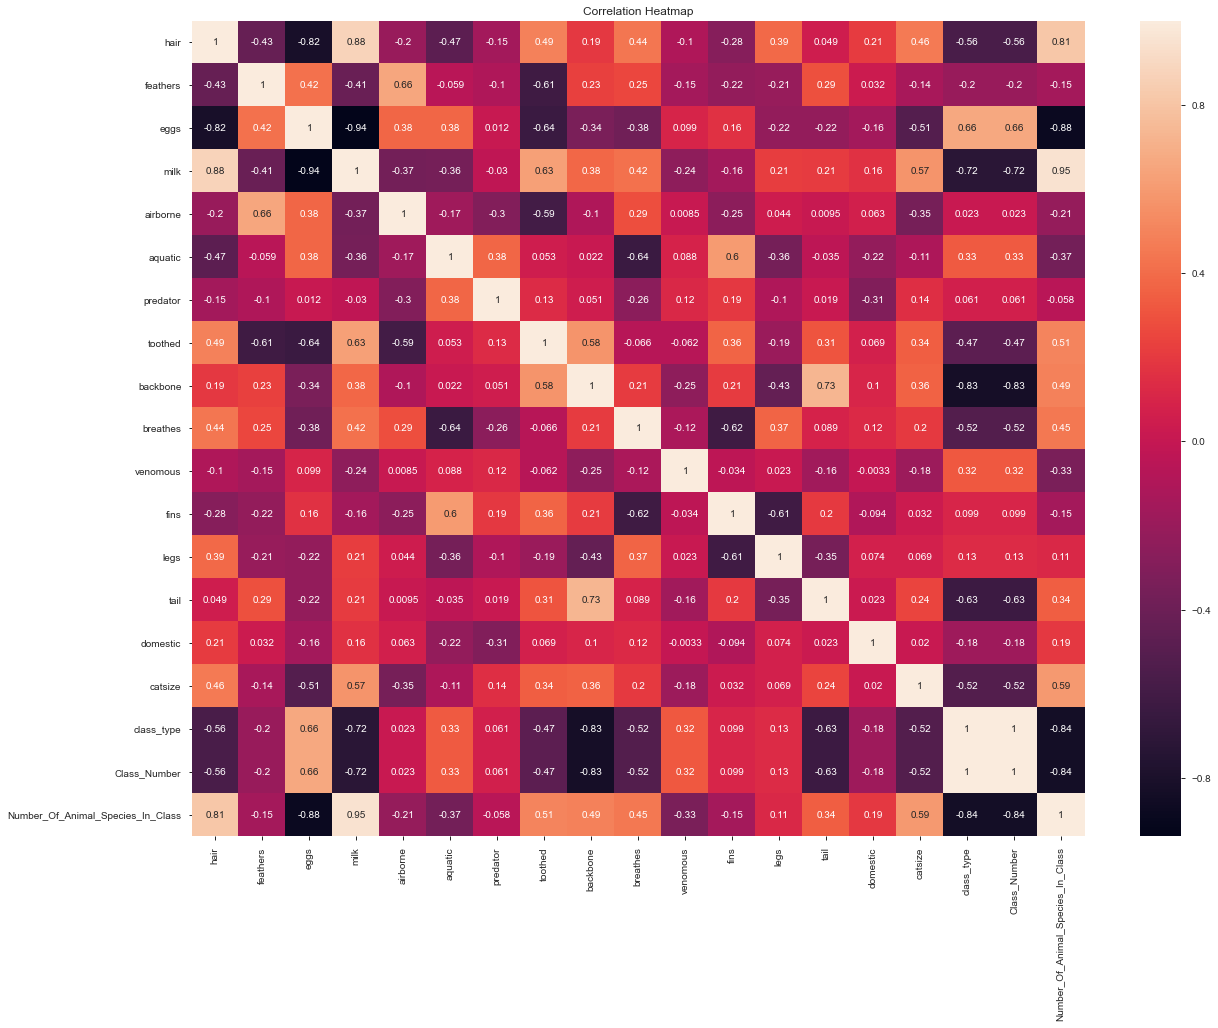

In [19]:

plt.subplots(figsize=(20,15))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = lol.corr()
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

_Si observamos la barra que se encuentra al costado derecho, esta muestra un indicador del 0.8 al -0.8 donde denotan 
    0.8: mayor relación entre dos variables.
    -0.8: menor relación entre dos variable._
    
_Ahora bien, las correlaciones más altas siempre van a ser las variables relacionadas consigo mismas, por ejemplo hair-hair, eggs-eggs, milk-milk, etc. Podemos verlo claramente en la línea diagonal._

_Las correlaciones medias son las que están entre el 0.8 y 0.4, por ejemplo eggs-feathers, hair-toothed, hair-breathes, etc._

_Las correlaciones bajas son las que están entre 0.0 y 0.4, por ejemplo breathes-backbone, legs-hair, predator-aquatic, etc._

_Entonces, este mapa de correlación nos ayuda a verificar qué característica tiene probabilidad de relacionarse con otra y ambas tengan coherencia con alguna especie._

_Mostrando correlaciones que son mayores que 0.7 (positivo o negativo)_

In [20]:
corr[corr != 1][abs(corr)> 0.7].dropna(how='all', axis=1).dropna(how='all', axis=0)

,hair,eggs,milk,backbone,tail,class_type,Class_Number,Number_Of_Animal_Species_In_Class
hair,NaN,-0.817382,0.878503,NaN,NaN,NaN,NaN,0.810689
eggs,-0.817382,NaN,-0.938848,NaN,NaN,NaN,NaN,-0.880370
milk,0.878503,-0.938848,NaN,NaN,NaN,-0.723683,-0.723683,0.953684
backbone,NaN,NaN,NaN,NaN,0.731762,-0.828845,-0.828845,NaN
tail,NaN,NaN,NaN,0.731762,NaN,NaN,NaN,NaN
class_type,NaN,NaN,-0.723683,-0.828845,NaN,NaN,NaN,-0.835864
Class_Number,NaN,NaN,-0.723683,-0.828845,NaN,NaN,NaN,-0.835864
Number_Of_Animal_Species_In_Class,0.810689,-0.880370,0.953684,NaN,NaN,-0.835864,-0.835864,NaN


_Se puede extraer de la tabla que hay alta correlación entre animales con las características de pelo y leche,columna vertebral y cola. También que hay muy poca correlación entre huevos y cabello,leche y huevos._

## 3. Graficas


- Apreciación visual de lo que se vio en la parte de estadistica sobre cuantos animales están en cada especie.

C:\Users\Lizee\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Lizee\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


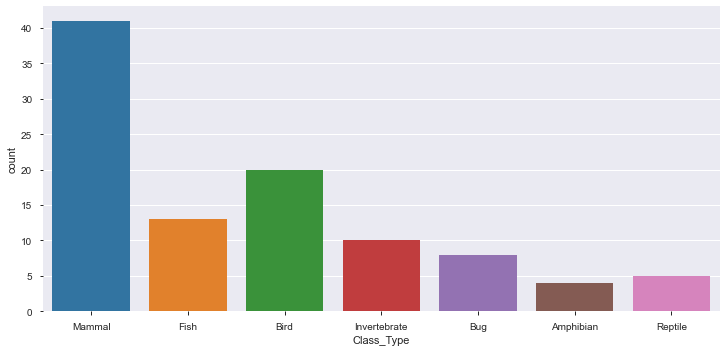

In [21]:
#Vea a qué clase pertenecen la mayoría de los animales del zoológico
sns.factorplot('Class_Type', data=lol, kind="count",size = 5,aspect = 2)


_Las asociaciones más frecuentes serán relacionadas a los mamíferos después a las aves y siguen los peces.._

- Algunas características concluyentes por cada clase.

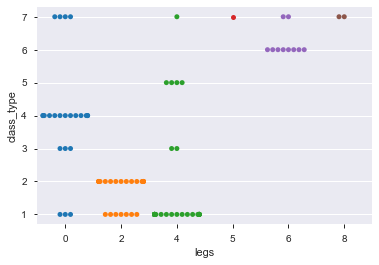

In [22]:
sns.swarmplot(lol['legs'], lol['class_type'])

_De acuerdo con la gráfica, donde el eje y denota el tipo de clase (Mammal (1), Bird (2), Reptile (3), Fish (4), Amfibios (5), Bug (6), Invertebrate (7)) y el eje x denota la cantidad de piernas, se concluye que al menos una minoría de los mamíferos, reptiles e invertebrados no tiene piernas, mientras que la mayoría de los peces tampoco tiene; que son más las aves, que los mamíferos, las que tienen dos piernas; que son más los mamíferos, que los reptiles, anfibios e invertebrados, los que tienen cuatro piernas; que sólo un invertebrado tiene cinco piernas; que son más los insectos, que los invertebrados, los que tienen seis piernas y, por último, que una minoría de los invertebrados tiene ocho piernas._

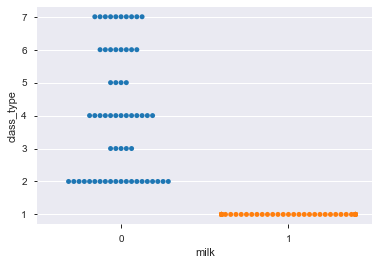

In [23]:
sns.swarmplot(lol['milk'], lol['class_type'])

_En esta gráfica se concluye que son los mamíferos los únicos que dan leche, si consideramos que 0 es falso y 1 es verdadero._

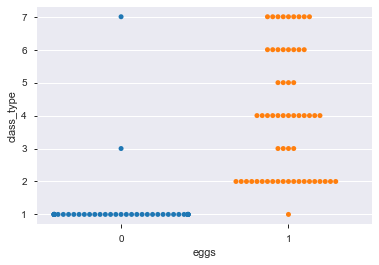

In [24]:
sns.swarmplot(lol['eggs'], lol['class_type'])

_Siguiendo la lógica de la gráfica anterior (0 es falso y 1 es verdadero), en esta se concluye que la mayoría de los mamíferos y una minoría de los reptiles e invertebrado, no ponen huevos, mientras que la mayoría de las demás especies sí lo hacen._

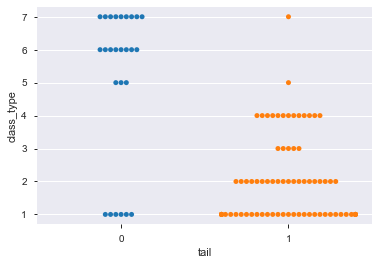

In [25]:

sns.swarmplot(lol['tail'], lol['class_type'])

_En esta gráfica se concluye que algunos mamíferos, anfibios, insectos e invertebrados no tienen cola. Las demás especies sí la tienen._

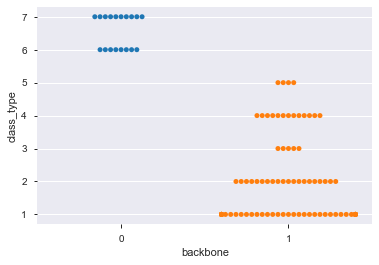

In [26]:
sns.swarmplot(lol['backbone'], lol['class_type'])

_En esta gráfica se concluye que los mamíferos, las aves, los reptiles, los peces y los anfibios no tienen columna vertebral, mientras que las demás especies sí la tienen._

_En conclusión, las gráficas nos han ayudado a identificar las especies que posean la carcaterística definida. Aunque sólo se elegieron cinco, funcionará con cualquier otra que queramos definir en el eje x._

# Conclusión 

El objetivo general de este proyecto de minería de datos es la recuperación, análisis y comparación de conocimiento por medio de árboles de decisiones. El problema principal planteado radica en encontrar reglas de asociación dentro de la base de datos ZOO, esto es para poder determinar patrones entre los datos que permitan las agrupaciones de especies según sus características morfológicas, y así afirmar y avalar las hipótesis demostradas de clasificaciones de animales en el proyecto, y resolver preguntas como:

•¿Las asociaciones más frecuentes están relacionadas a los mamíferos?.

•¿Las características más concluyentes son referentes a la agrupación de animales para las especies “mamíferos”, “aves” y “peces”?.

•¿Características tales como pelaje, número de patas o la capacidad de amamantar son concluyentes al momento de la clasificación de animales dentro de la especie “mamíferos”?.